# Working with Dates

In [1]:
import pandas as pd
from dfply import *
import matplotlib.pylab as plt
%matplotlib inline

## Outline

* Working with dates.
* Working with text columns.
* Getting started with regular expressions.

## Working with dates

* Pandas is great with dates!
* Converting
* Getting dateparts
* Windows and more

## Example - Uber pickup

The following data represent all Uber pickups in New York City in April 2014.  Find the data and more information at [this repository](https://github.com/fivethirtyeight/uber-tlc-foil-response).

In [2]:
uber_april_raw = pd.read_csv("./data/uber-raw-data-apr14.csv")
uber_april_raw.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
uber_april_raw.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

## Cleaning Step 1 - Cleaning Names

In [4]:
uber_april_rename = (uber_april_raw >>
                rename(date = 'Date/Time'))
uber_april_rename.head()

,date,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## Changing to date type with  `pd.to_datetime`

In [5]:
pd.to_datetime(uber_april_rename.date.head())

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: date, dtype: datetime64[ns]

## Converting to dates with `dfply`

In [6]:
from more_dfply import to_datetime

uber_april = (uber_april_rename >>
                mutate(date = to_datetime(X.date)))
uber_april.head()

,date,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [7]:
uber_april.dtypes

date    datetime64[ns]
Lat            float64
Lon            float64
Base            object
dtype: object

##  Datetime utility functions

The most important helper functions live in the `dt` attribute.  Some examples follow

In [9]:
[m for m in dir(uber_april.date.dt) if not m.startswith('_')]

['ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekday_name',
 'weekofyear',
 'year']

## Extracting dateparts

* Primary/typical transformation
* Pandas provides datepart attributes

In [10]:
uber_april.date.dt.hour.head()

0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

In [11]:
uber_april.date.dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [12]:
uber_april.date.dt.dayofweek.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [13]:
uber_april.date.dt.weekday_name.head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: date, dtype: object

## Exploring datepart distributions

* Important step in understanding patterns
* Makes it possible to find errors

## Weekday frequency ordered by frequency

In [14]:
uber_april.date.dt.weekday_name.value_counts()

Wednesday    108631
Tuesday       91185
Friday        90303
Thursday      85067
Saturday      77218
Monday        60861
Sunday        51251
Name: date, dtype: int64

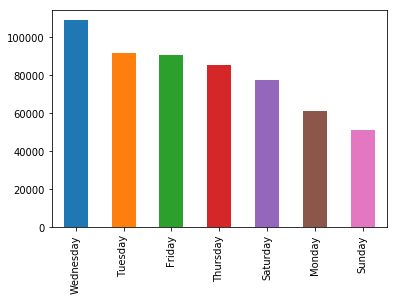

In [15]:
uber_april.date.dt.weekday_name.value_counts().plot('bar')

## Weekday ordered chronologically

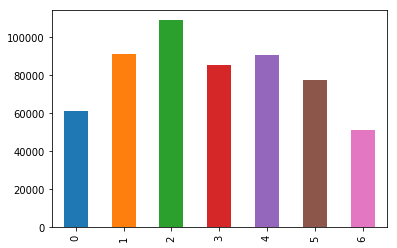

In [50]:
uber_april.date.dt.dayofweek.value_counts(sort=False).plot('bar')

## <font color="red"> Exercise 1 </font>

Explore the distributions of rides by hour and minute

## Pandas specific date tricks

* Step 1 - Switch dates to indexes
* Step 2- Use Pandas timeseries tools
    * Filter by date
    * Aggregate by dates

## Moving dates to indexes using `set_index`

In [17]:
uber_april_indexed = uber_april.set_index('date')
uber_april_indexed.head()

,Lat,Lon,Base
date,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512


## Pandas index - more than you think

**TODO:** Add images of standard index, dates, labels 

## Setting indexes  - the `dfply` way

In [18]:
from more_dfply import set_index

uber_idx = (uber_april >>
              set_index(X.date) >>
              drop(X.date))
uber_idx.head()

,Lat,Lon,Base
date,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [19]:
uber_idx.index

DatetimeIndex(['2014-04-01 00:11:00', '2014-04-01 00:17:00',
               '2014-04-01 00:21:00', '2014-04-01 00:28:00',
               '2014-04-01 00:33:00', '2014-04-01 00:33:00',
               '2014-04-01 00:39:00', '2014-04-01 00:45:00',
               '2014-04-01 00:55:00', '2014-04-01 01:01:00',
               ...
               '2014-04-30 23:00:00', '2014-04-30 23:04:00',
               '2014-04-30 23:05:00', '2014-04-30 23:15:00',
               '2014-04-30 23:18:00', '2014-04-30 23:22:00',
               '2014-04-30 23:26:00', '2014-04-30 23:31:00',
               '2014-04-30 23:32:00', '2014-04-30 23:48:00'],
              dtype='datetime64[ns]', name='date', length=564516, freq=None)

In [20]:
uber_idx.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
           dtype='int64', name='date', length=564516)

In [21]:
uber_idx.index.hour

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='date', length=564516)

In [22]:
uber_idx.index.weekday_name

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
      dtype='object', name='date', length=564516)

In [79]:
uber_idx['2014-04-03':'2014-04-05'].head()

,Lat,Lon,Base
date,,,
2014-04-03 00:00:00,40.7422,-74.0062,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7104,-74.0118,B02512
2014-04-03 00:10:00,40.7221,-73.9837,B02512


## Index slicing - the `dfply` way

In [24]:
from more_dfply import row_index_slice

(uber_idx >>
   row_index_slice('2014-04-03') >>
   head)

,Lat,Lon,Base
date,,,
2014-04-03 00:00:00,40.7422,-74.0062,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7104,-74.0118,B02512
2014-04-03 00:10:00,40.7221,-73.9837,B02512


In [25]:
(uber_idx >>
   row_index_slice('2014-04-03','2014-04-05') >>
   head)

,Lat,Lon,Base
date,,,
2014-04-03 00:00:00,40.7422,-74.0062,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7239,-74.0034,B02512
2014-04-03 00:02:00,40.7104,-74.0118,B02512
2014-04-03 00:10:00,40.7221,-73.9837,B02512


## Row indexing with boolean expressions

In [84]:
(uber_idx >>
   row_index_slice(X.index.day == 2) >>
   head)

,Lat,Lon,Base
date,,,
2014-04-02 00:00:00,40.7458,-73.9843,B02512
2014-04-02 00:05:00,40.7285,-74.0467,B02512
2014-04-02 00:07:00,40.7732,-73.9546,B02512
2014-04-02 00:11:00,40.6550,-73.9786,B02512
2014-04-02 00:21:00,40.7405,-74.0040,B02512


In [26]:
(uber_idx >>
   row_index_slice(X.index.weekday_name == 'Monday') >>
   head)

,Lat,Lon,Base
date,,,
2014-04-07 00:31:00,40.7205,-73.9939,B02512
2014-04-07 00:37:00,40.7407,-74.0077,B02512
2014-04-07 00:50:00,40.7591,-73.9892,B02512
2014-04-07 00:58:00,40.7419,-74.0034,B02512
2014-04-07 01:27:00,40.7419,-74.0034,B02512


## Using resample to aggregate by dateparts

* Reshape will redefine the rows
* Works with aggregation line `mean` or `count`

In [35]:
@pipe
@symbolic_evaluation(eval_symbols=[0])
def resample(df,rule,how=None,axis=0,fill_method=None,closed=None,
label=None,convention='start',kind=None,loffset=None,
limit=None,base=0,on=None,level=None):
    return df.resample(rule, how=how, axis=axis, fill_method=fill_method, 
                  closed=closed, label=label, convention=convention, 
                  kind=kind, loffset=loffset, limit=limit, base=base, 
                  on=on, level=level)

In [46]:
weekly_counts = ((uber_idx >>
                   mutate(ones = np.ones(uber_idx.shape[0])) >>
                   select(X.ones) >>
                   resample('W')).sum() >>
                 rename(counts = 'ones'))
weekly_counts

,counts
date,
2014-04-06,112401.0
2014-04-13,123324.0
2014-04-20,115698.0
2014-04-27,138532.0
2014-05-04,74561.0


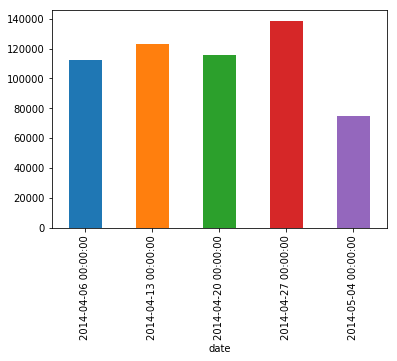

In [48]:
weekly_counts.counts.plot('bar')

## <font color="red"> Exercise 2 </font>

Explore the distributions of rides by hour, this time using the indexes to resample

## Note on writing to csv

To preserve the dates, 

* make sure you use `index=True`
* This will write the index as the first column

In [54]:
weekly_counts.to_csv('uber_april_weekly_counts.csv', index=True)

In [55]:
!cat uber_april_weekly_counts.csv

date,counts
2014-04-06,112401.0
2014-04-13,123324.0
2014-04-20,115698.0
2014-04-27,138532.0
2014-05-04,74561.0
